In [2]:
import numpy as np
from obspy import read
import obspy
import obspy.core.trace 
import obspy.core.stream
import matplotlib.pyplot as plt
import os
import pandas as pd
from tdms_reader import TdmsReader
import scipy.fft as ft
from spectral import trace_spectrum
from read_tdms_to_stream import read_tdms_to_stream
%matplotlib inline

In [3]:
path = '/home/deepankar/DAS_2021/Sample_data/' #change to path of Sample_data
dirlist = sorted(os.listdir(path))
print("\n".join(dirlist))
print(path+dirlist[1])

OUEast_21Aprilconfig_UTC_20210425_103044.162.tdms
OUEast_21Aprilconfig_UTC_20210428_122244.162.tdms
OUEast_21Aprilconfig_UTC_20210428_122344.162.tdms
OUEast_21Aprilconfig_UTC_20210428_134344.162.tdms
OUEast_21Aprilconfig_UTC_20210428_160044.162.tdms
OUEast_21Aprilconfig_UTC_20210428_160144.162.tdms
OUEast_21Aprilconfig_UTC_20210428_160244.162.tdms
OUEast_21Aprilconfig_UTC_20210428_160344.162.tdms
OUEast_21Aprilconfig_UTC_20210428_160444.162.tdms
OUEast_21Aprilconfig_UTC_20210428_160544.162.tdms
OUEast_21Aprilconfig_UTC_20210428_160644.162.tdms
OUEast_21Aprilconfig_UTC_20210428_160744.162.tdms
OUEast_21Aprilconfig_UTC_20210428_160844.162.tdms
OUEast_UTC_20210406_204425.175.tdms
OUEast_UTC_20210406_204440.175.tdms
OUEast_UTC_20210406_204455.175.tdms
OUEast_UTC_20210406_211140.088.tdms
OUEast_UTC_20210406_215817.318.tdms
OUEast_UTC_20210412_220459.980.tdms
OUEast_UTC_20210412_220559.980.tdms
OUEast_UTC_20210412_220659.980.tdms
OUEast_UTC_20210412_220759.980.tdms
OUEast_UTC_20210413_143459

In [32]:
stations = np.arange(100,10000,100)
st1 = read_tdms_to_stream(path+dirlist[4],stations,50)
st2 = read_tdms_to_stream(path+dirlist[5],stations,50)

traces in stream : 99
traces in stream : 99


In [43]:
st = st1+st2
st = st.merge(method = 0,fill_value = 'interpolate',interpolation_samples = -1)

In [44]:
#stream processing
st = st.normalize()

#st = st.filter("bandpass",freqmin = 5,freqmax = 10) #change min max frequency. or use "lowpass" or "highpass"
st = st.filter("lowpass",freq = 20) #change min max frequency. or use "lowpass" or "highpass"

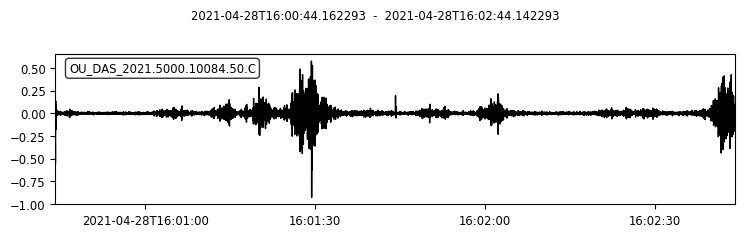

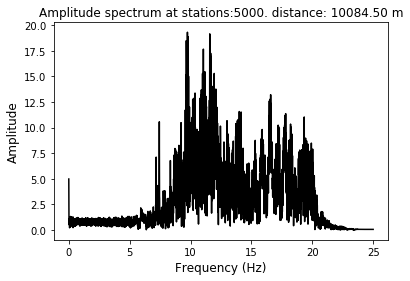

In [45]:
#trace plotting and spectrum

from spectral import trace_spectrum
tr = st.select(station = '5000')[0] #select one station. Eg. station 1000 selected here
tr.plot()
trace_spectrum(tr)

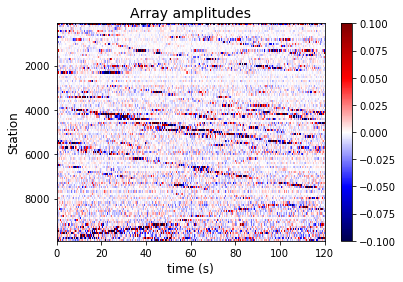

In [46]:
#Convert 
stream_data = st[0].data
for tr in range(1,len(st)):
    trace_data = st[tr].data
    stream_data = np.vstack([stream_data,trace_data])

sampleRate = st[0].stats.sampling_rate

#stream plotting
from amplitude import stream_amplitude
time = [0, 120] #change
maxamp = 1 #change
stream_amplitude(stream_data[:,:],stations[:],time,sampleRate,0.1*maxamp)

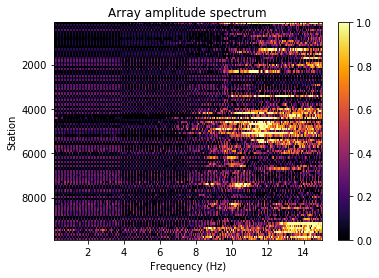

In [47]:
#stream spectrum
from spectral import stream_spectrum
freq = [0.1,15] #change
cbar_lim =[0,1] #change
stream_spectrum(stream_data,stations,freq,sampleRate,'log10',cbar_lim) #change to linear scale

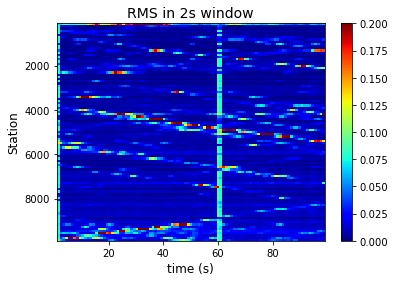

In [49]:
from amplitude import stream_RMS
time = [0,100]
amp = 0.2
win = 2
step =1 
stream_RMS(stream_data,stations[0:1000], time,sampleRate,win,step,amp)